In [1]:
import networkx as nx
import random
from random import *
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import binom
from scipy.stats import poisson
import seaborn as sns
from math import factorial

In [2]:
def adc_nodes(x): # adiciona t novos nós na rede
    m = 2
    
    for t in range(len(g)+1, len(g) + x + 1):
        m_init = len(g.edges)
        g.add_node(t)

        graus = [] # guardar só o grau de cada nó

        for i in range(1, len(g)):
            graus.append(g.degree[i])

        prob = [] # formula 5.1 livro Networks
        for i in range(len(graus)):
            prob.append(graus[i]/sum(graus))

        while len(g.edges) < m_init + m:
            for i in range(1, len(g)):  # vies de olhar sempre do começo?
                # vai de 1 a len(g) pq eu já adc 1 node acima então corrige uma vez que
                # a prob de self-link está em outro loop
                #se eu tirar os nodes que já estão ligados a t, fica mais rapido
                p = random()

                if p < prob[i-1]:
                    g.add_edge(i, t)
    
    return graus

Gerar a rede inicial, ponto de partida:

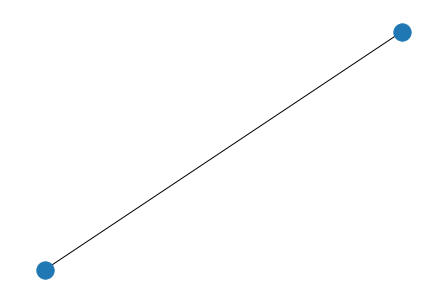

In [3]:
g = nx.Graph()
g.add_edge(1,2)

nx.draw(g)

Usar recorrencia para adicionar os nós.
Caso queira alterar a quantidade (m) de links que são adicionados em cada etapa, editar na definição da função.
Lembrando que m >= m_0, onde m_0 é a quantidade de nós iniciais.

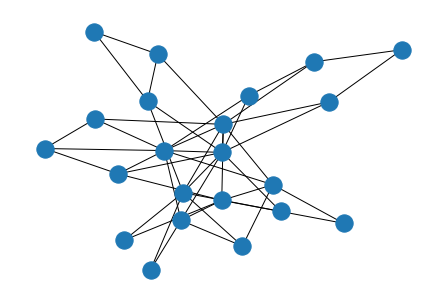

In [4]:
adc_nodes(20)
nx.draw(g)

In [5]:
g.degree

DegreeView({1: 9, 2: 9, 3: 8, 4: 4, 5: 3, 6: 7, 7: 4, 8: 6, 9: 5, 10: 3, 11: 3, 12: 3, 13: 2, 14: 5, 15: 2, 16: 3, 17: 3, 18: 2, 19: 2, 20: 3, 21: 2, 22: 2})

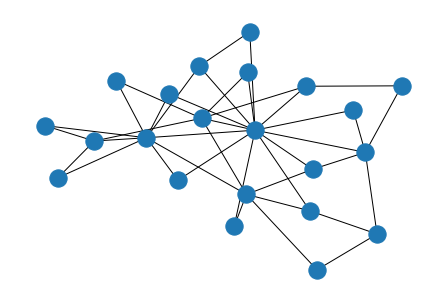

In [6]:
gfunc = nx.barabasi_albert_graph(len(g), 2)
nx.draw(gfunc)

In [7]:
gfunc.degree

DegreeView({0: 6, 1: 13, 2: 6, 3: 3, 4: 2, 5: 3, 6: 5, 7: 3, 8: 9, 9: 3, 10: 2, 11: 4, 12: 2, 13: 2, 14: 2, 15: 3, 16: 2, 17: 2, 18: 2, 19: 2, 20: 2, 21: 2})

Distribuição de grau e coeficiente gama

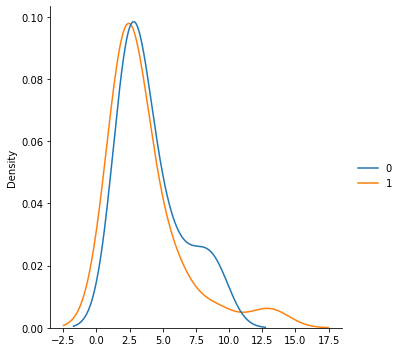

In [8]:
graus = []
graus_gfunc = []
N_k = [] # qtd de nós com grau k

for i in g.nodes:
    graus.append(g.degree[i])

for i in gfunc.nodes:
    graus_gfunc.append(gfunc.degree[i])

set_graus = list(set(graus))
set_graus_gfunc = list(set(graus_gfunc))

for i in range(len(set_graus)):
    N_k.append(graus.count(set_graus[i]))

sns.displot((graus, graus_gfunc ), kind="kde")